In [3]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 60

df = pd.read_csv('./Downloads/automobile.txt')
df.replace('?', np.nan, inplace=True)  # Fixed: '?' instead of '/', and added missing quote
print('Initial shape:', df.shape)
df.head()

Initial shape: (205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'engine-size']
for c in numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

print('Before drop duplicates:', df.shape)
df.drop_duplicates(inplace=True)
df_clean = df.dropna()
print('After cleaning:', df_clean.shape)

df_clean.to_csv('./Downloads/automobile_cleaned.csv', index=False)
df_clean.head()

Before drop duplicates: (205, 26)
After cleaning: (159, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


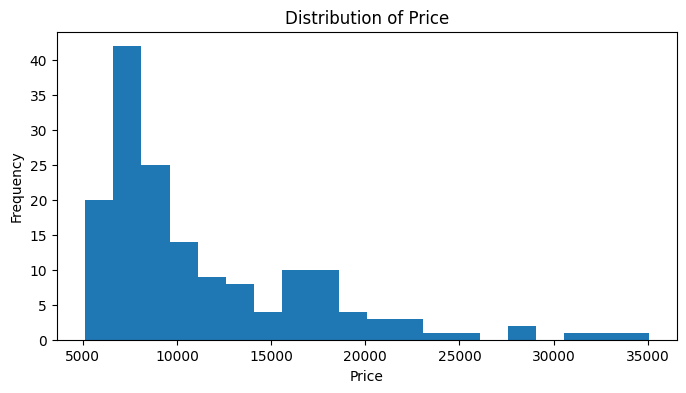

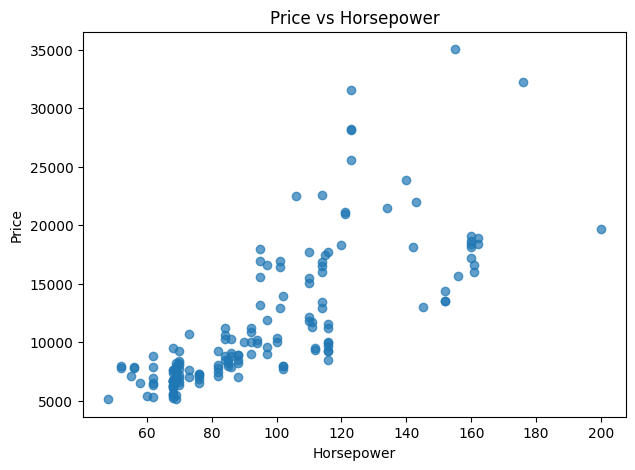

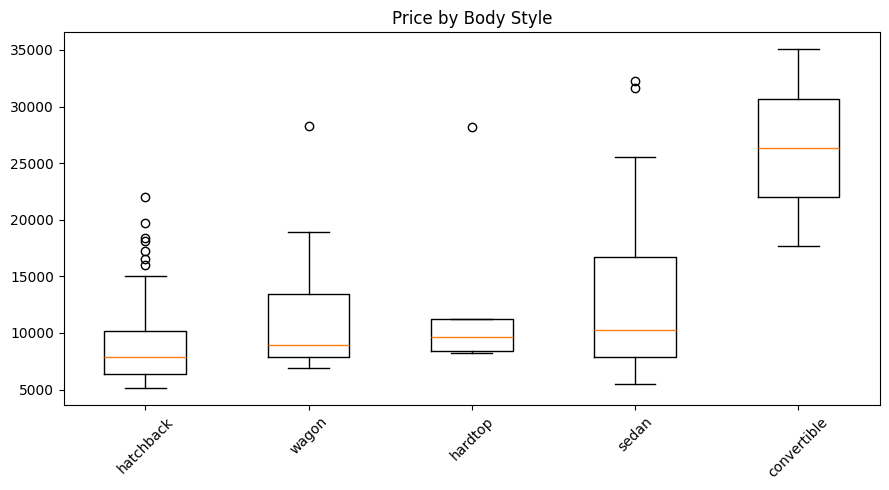

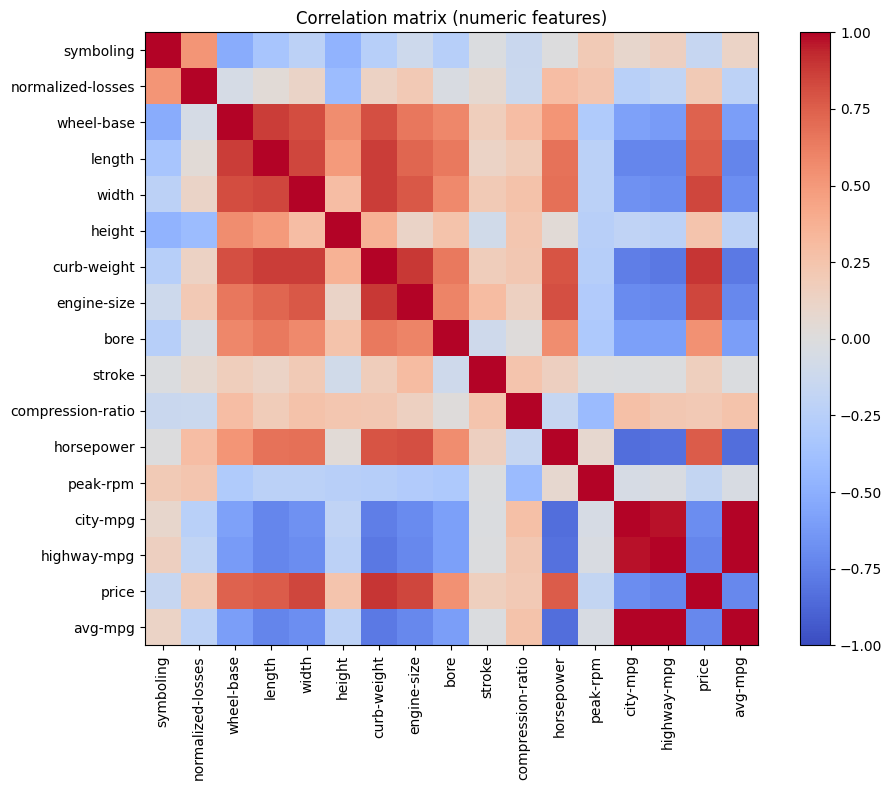

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load cleaned data
c = pd.read_csv('./Downloads/automobile_cleaned.csv')

# 1. Distribution of Price
plt.figure(figsize=(8,4))
plt.hist(c['price'].astype(float), bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Price vs Horsepower
plt.figure(figsize=(7,5))
plt.scatter(c['horsepower'].astype(float), c['price'].astype(float), alpha=0.7)
plt.title('Price vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()

# 3. Price by Body Style 
plt.figure(figsize=(9,5))
order = c.groupby('body-style')['price'].median().sort_values().index
groups = [c[c['body-style']==b]['price'].astype(float) for b in order]
plt.boxplot(groups, tick_labels=order)  # FIXED: labels → tick_labels
plt.title('Price by Body Style')
plt.xticks(rotation=45)  # Added rotation for better readability
plt.tight_layout()
plt.show()

# 4. Correlation matrix
plt.figure(figsize=(10,8))
numcols = c.select_dtypes(include=[float,int]).columns
corr = c[numcols].corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(numcols)), numcols, rotation=90)
plt.yticks(range(len(numcols)), numcols)
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()
plt.show()

In [6]:
# Remove rows with any missing values
df_clean = df.dropna()
print(f"Original shape: {df.shape}")
print(f"After removing missing values: {df_clean.shape}")

Original shape: (205, 26)
After removing missing values: (159, 26)


In [9]:
df_clean = df.dropna().copy()

numeric_cols = ['symboling', 'engine-size', 'city-mpg', 'highway-mpg']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(np.int64)
        print(f"Converted {col} to int64")

print("\nData types after conversion:")
print(df_clean[numeric_cols].dtypes)

Converted symboling to int64
Converted engine-size to int64
Converted city-mpg to int64
Converted highway-mpg to int64

Data types after conversion:
symboling      int64
engine-size    int64
city-mpg       int64
highway-mpg    int64
dtype: object


In [10]:
hatchback_cars = df_clean[df_clean['body-style'] == 'hatchback']
print(f"Number of hatchback cars: {len(hatchback_cars)}")
hatchback_cars.head()


Number of hatchback cars: 56


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
19,1,98.0,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70.0,5400.0,38,43,6295.0
21,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.41,68.0,5500.0,37,41,5572.0
22,1,118.0,dodge,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1876,ohc,four,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6377.0
23,1,118.0,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.60,102.0,5500.0,24,30,7957.0


In [11]:
df_clean.to_csv('./Downloads/automobile_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [12]:
most_expensive = df_clean.nlargest(5, 'price')[['make', 'body-style', 'price', 'city-mpg', 'highway-mpg']]
print("5 Most Expensive Cars:")
most_expensive

# Compare with cheapest cars
cheapest = df_clean.nsmallest(5, 'price')[['make', 'body-style', 'price', 'city-mpg', 'highway-mpg']]
print("\n5 Cheapest Cars:")
cheapest

5 Most Expensive Cars:

5 Cheapest Cars:


,make,body-style,price,city-mpg,highway-mpg
138,subaru,hatchback,5118.0,31,36
18,chevrolet,hatchback,5151.0,47,53
50,mazda,hatchback,5195.0,30,31
150,toyota,hatchback,5348.0,35,39
76,mitsubishi,hatchback,5389.0,37,41


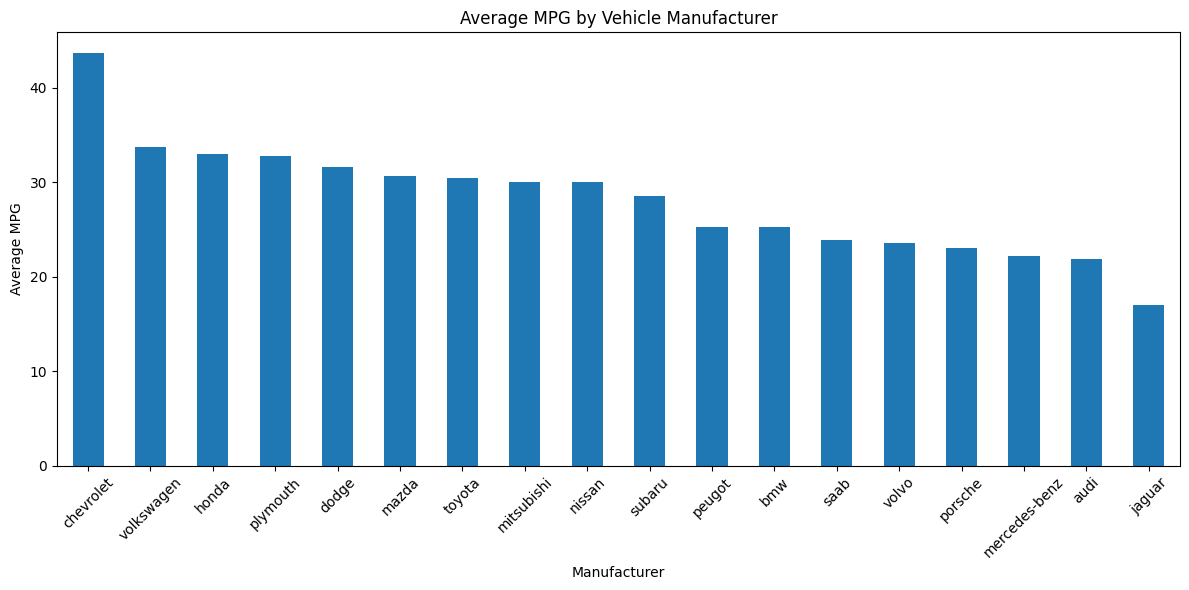

Most fuel efficient manufacturers:


make
chevrolet     43.666667
volkswagen    33.687500
honda         32.923077
plymouth      32.750000
dodge         31.562500
Name: avg-mpg, dtype: float64

In [13]:
# Calculate average consumption 
df_clean['avg-MPG'] = (df_clean['city-mpg'] + df_clean['highway-mpg']) / 2

# Group by manufacturer and get average consumption
fuel_efficiency = df_clean.groupby('make')['avg-mpg'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(12, 6))
fuel_efficiency.plot(kind='bar')
plt.title('Average MPG by Vehicle Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average MPG')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Most fuel efficient manufacturers:")
fuel_efficiency.head()

In [14]:
largest_engines = df_clean.nlargest(10, 'engine-size')[['make', 'body-style', 'engine-size', 'horsepower', 'price']]
print("Vehicles with Largest Engine Capacity:")
largest_engines

Vehicles with Largest Engine Capacity:


,make,body-style,engine-size,horsepower,price
47,jaguar,sedan,258,176.0,32250.0
72,mercedes-benz,convertible,234,155.0,35056.0
67,mercedes-benz,sedan,183,123.0,25552.0
68,mercedes-benz,wagon,183,123.0,28248.0
69,mercedes-benz,hardtop,183,123.0,28176.0
70,mercedes-benz,sedan,183,123.0,31600.0
101,nissan,sedan,181,152.0,13499.0
102,nissan,wagon,181,152.0,14399.0
103,nissan,sedan,181,152.0,13499.0
104,nissan,hatchback,181,160.0,17199.0


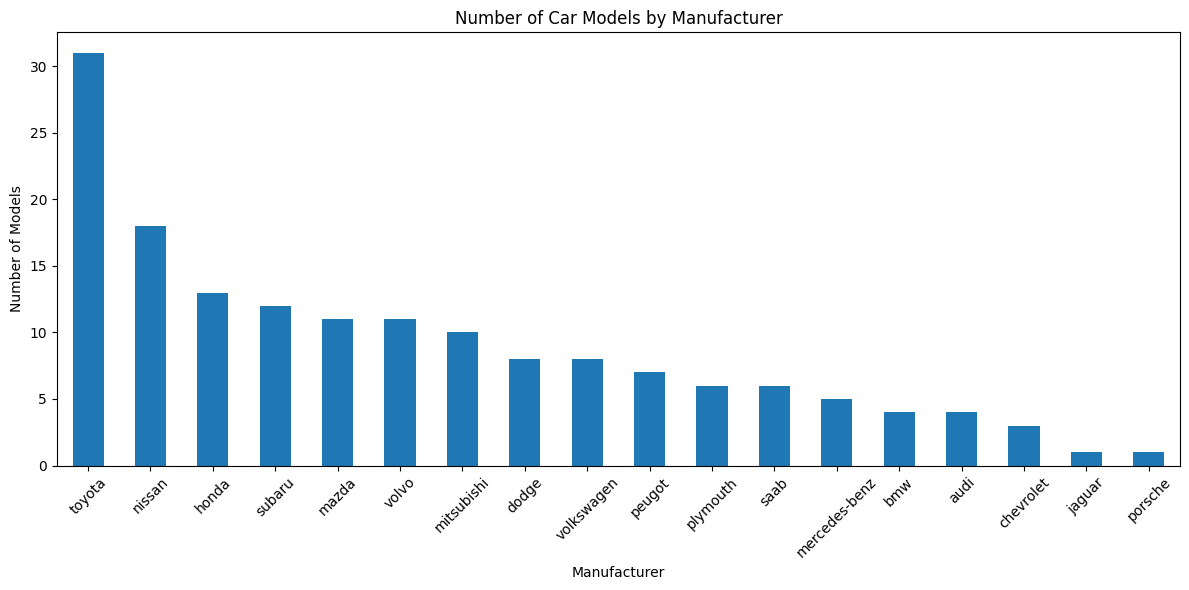

Manufacturers with most models:


make
toyota    31
nissan    18
honda     13
subaru    12
mazda     11
Name: count, dtype: int64

In [15]:
manufacturer_counts = df_clean['make'].value_counts()

# Create visualization
plt.figure(figsize=(12, 6))
manufacturer_counts.plot(kind='bar')
plt.title('Number of Car Models by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Manufacturers with most models:")
manufacturer_counts.head()

In [16]:
df_clean.to_csv('./Downloads/automobile_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
